## Семинар 2 "Распознавание рукописных цифр"

ФИО: 

В этом задании мы используем нейронную сеть из предыдущего семинара для распознавания рукописных цифр. Также мы исследуем как влияет выбор нелинейности и предобработка данных на качество классификации. 

Чтобы не тратить время на подготовку данных, мы прилагаем готовый код с примером использования для получения обучающей и тестовой выборок. Для запуска скрипта вам понадобится библиотека PyTorch (инструкции по установке можно найти на сайте <a href="http://pytorch.org">pytorch.org</a>)

In [35]:
from PIL import PILLOW_VERSION

In [36]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
from layers import Linear, Sigmoid, NLLLoss, NeuralNetwork # Results from Seminar 1
%matplotlib inline

In [183]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32,  shuffle=True)

In [184]:
## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    pass

In [143]:
temp1 = np.zeros(1)
temp2 = np.zeros(1)

In [138]:
for X_test, y_test in test_loader:
    X_test = X_test.view(X_test.shape[0], -1)
    X_test = X_test.numpy()
    temp1 = X_test[0]
    y_test = y_test.numpy()
    print(X_test.shape)
    pass

(10000, 784)


In [139]:
for X_test, y_test in test_loader:
    X_test = X_test.view(X_test.shape[0], -1)
    X_test = X_test.numpy()
    y_test = y_test.numpy()
    temp2 = X_test[0]
    print(X_test.shape)
    pass

(10000, 784)


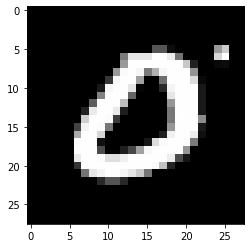

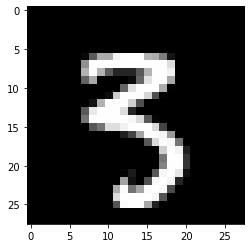

In [140]:
plt.imshow(temp1.reshape(28, 28), cmap=plt.cm.Greys_r)
plt.show()
plt.imshow(temp2.reshape(28, 28), cmap=plt.cm.Greys_r)
plt.show()

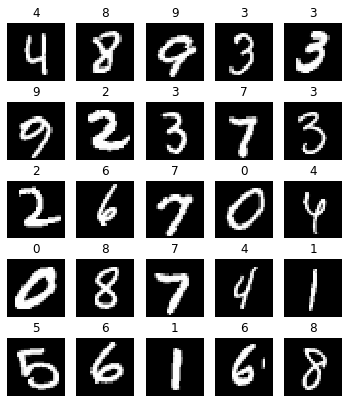

In [103]:
plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

### Часть 1: MNIST
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности. Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.01

In [185]:
print(X_test.shape)

(10000, 784)


In [186]:
def predict(res):
    return np.argmax(res, axis=1)

In [191]:
nn = NeuralNetwork([Linear(784, 1000), Sigmoid(), Linear(1000, 1000), Sigmoid(), Linear(1000, 100), Sigmoid(), Linear(100, 10)])
nll_loss = NLLLoss()
loss = []
accuracy = []
for i in range(1000):
    for X, y in train_loader:
        X = X.view(X.shape[0], -1)
        X = X.numpy() ### Converts torch.Tensor to numpy array
        y = y.numpy()
        res = nn.forward(X)
        loss_ = nll_loss.forward(res, y)
        loss.append(loss_)
        dLdy = nll_loss.backward()
        nn.backward(dLdy)
        nn.step(0.01)
    if((i % 50) == 0):
        print(i)
        res_ = nn.forward(X_test)
        print(np.sum(y_test != predict(res_))/len(y_test))

0
0.8972
50
0.0778
100
0.0306
150
0.0258


KeyboardInterrupt: 

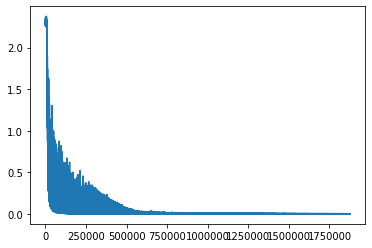

In [188]:
plt.plot(np.arange(len(loss)), loss)

In [189]:
res = nn.forward(X_test)

In [190]:
np.sum(y_test != predict(res))/len(y_test)

0.0232

### Часть 2: Нелинейности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.



### Часть 3: Анализ ошибок
На каких объектах сеть ошибается больше всего?

### HW1 (1 балл): Реализовать Tanh

### Часть 4: Аугментация (HW, 2 балла)
* Небольшие вращения (-15, 15)
* Случайные сдвиги
* Шум

Какой прирост дают эти аугментации вместе и по отдельности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

### Часть 5: Выводы
Опишите полученные результаты: как влияют выбор нелинейности и предобработка данных на скорость сходимости и итоговое качество?